## Permutation Test

There are several cases where we would like to perform a permuation test in order to test a hypothesis and learn more about the world. A permutation test is a very useful type of non-parametric test that allows us to make inferences without making statistical assumptions that underly traditional parametric tests.

One insightful example of permutation inference is the reexamination of Student Evaluation of Teaching (SET) data by Boring, Ottoboni, and Stark (2016). In this experiment, 47 students were randomly assigned to one of four sections. In two of the sections, the teaching
assistants were introduced using their actual names. In the other two sections, the assistants
switched names.



In [0]:
#HIDDEN 
from IPython.display import Image
Image('student_setup.png')

 Students never met the teaching assistants face-to-face. Instead, they interacted with the students via an online forum. Homework returns were coordinated so that all students received scores/feedback all at the same time. The 2 TAs also had comparable levels of experience. At the end of the course, students evaluate the TA on promptness in returning assignment.
The authors wanted to investigate if
gender perception has any effect on SETs evaluations/ratings. 


### Experiment Setup



In our **model**, each TA has two possible ratings from each student—one for each perceived gender. Furthermore, each student had an equal chance of being assigned to any one of the (gender, perceived gender) pairs. The students evaluate their TAs independently of
one another.

The **null hypothesis** of this experiment is that perceived gender has no effect on SETs and any observed difference in ratings is due to chance. In other words, the evaluation of each TA should remain unchanged whether they are percieved as a male or a female.
This means that each TA really only has one possible rating from each student.

The **test statistic** that we use the the difference in means of perceived male and perceived female ratings for each TA. Intuitively, we expect this to be close to 0 if gender has no effect on ratings.

In order to determine whether gender has an effect on SET ratings, we will perform a permutation test in order to get the distribution of the test statistic under the null hypothesis. We will follow the following steps:

* Permute the perceived gender labels for students under the same TA. Note that we are shuffling within the left and right halves in the picture above.
* Compute the difference in average scores for identified-female and identified-male groups. 
* Repeat many times to create an approximate sampling distribution for the difference in average scores for the 2 groups. 
* Use the approximate distribution to estimate the chance of observing -0.8 or lower


It is important to understand why the permutation test is justified in this scenario. Under the null model, each student would have given their TA the same rating regardless of perceived gender. Simple random assignment then implies that for a given TA, all of their ratings had an equal chance of showing up under perceived male or perceived female. Therefore, permuting the gender labels should have no effect on the ratings if the null hypothesis were true. 

### The Data

We begin with the student and gender data below. These data are collected from 2008 to 2013 and are a census of 23,001 SET from 4,423 (57% women) first-year students in
1,177 sections at a French university, taught by 379 instructors (34% women). 

In [2]:
#HIDDEN 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab
%matplotlib inline

import io

from google.colab import files
uploaded = files.upload()

student_eval = pd.read_csv(io.StringIO(uploaded['StudentRatingsData.csv'].decode('utf-8')))
student_eval = student_eval.loc[:, ["group", "tagender", "taidgender", "prompt"]]
student_eval.head()

Saving StudentRatingsData.csv to StudentRatingsData.csv


,group,tagender,taidgender,prompt
0,3,0,1,4.0
1,3,0,1,5.0
2,3,0,1,5.0
3,3,0,1,5.0
4,3,0,1,3.0


In [0]:
student_eval = student_eval.dropna()

The columns have the following meanings:

**tagender** – the true gender of the TA

**taidgender** – the gender presented to the students

**prompt** – rating on promptness of HW on a scale from 1 to 5

### Performing the Experiment

We will compute the observed difference between the average ratings of the identified male and identified female groups:

In [3]:
percieved_male = student_eval[student_eval["taidgender"] == 1]
percieved_female = student_eval[student_eval["taidgender"] == 0]
observed_difference = np.mean(percieved_female["prompt"]) - np.mean(percieved_male["prompt"])
observed_difference

-0.7978260869565217

We see that the difference is -0.8. In other words, the average for those identified as female is nearly 1 point lower on a scale from 1 to 5.  Is this a big/significant difference? Or could this have simply happened by chance? We will perform a permutation test to explore these questions.

Now, we can permute the perceived gender labels for each TA and calculate the test statistic 1,000 times:

In [0]:
student_eval

In [31]:
gender_differences = np.array([])
repetitions = 1000

for i in np.arange(repetitions):
  
  true_male = student_eval[student_eval["tagender"] == 1]
  true_female = student_eval[student_eval["tagender"] == 0]
  
  shuffled_male = np.random.permutation(true_male["tagender"])
  shuffled_female = np.random.permutation(true_female["tagender"])

  true_male["shuffled gender"] = shuffled_male
  true_female["shuffled gender"] = shuffled_female
  
  percieved_male1 = true_male[true_male["shuffled gender"] == 0]
  percieved_male2 = true_female[true_female["shuffled gender"] == 0]
  percieved_male_rating = np.append(percieved_male1["prompt"], percieved_male2["prompt"])
  percieved_female1 = true_male[true_male["shuffled gender"] == 1]
  percieved_female2 = true_female[true_female["shuffled gender"] == 1]
  percieved_female_rating = np.append(percieved_female1["prompt"], percieved_female2["prompt"])
  
  # Calculate differences
  gender_difference = np.mean(percieved_female_rating) - np.mean(percieved_male_rating)
  gender_differences = np.append(gender_differences, gender_difference)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


We can now view the approximate sampling distribution of the difference in scores from our permutations.

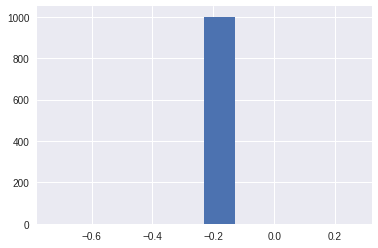

In [32]:
differences_df = pd.DataFrame()
differences_df["gender_differences"] = gender_differences
differences_df.loc[:, "gender_differences"].hist()

From our calculation below, X of the 1000 simulations had a difference as large as the one observed. Therefore, our p -value is less than the 0.005 threshold.

In [35]:
num_extreme = np.count_nonzero(gender_differences <= observed_difference)
empirical_P = num_extreme / repetitions
empirical_P

0

### Conclusion

Through this permuatation test, we have shown that SET are biased against female instructors by an amount that is large and statistically significant.